In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from scipy.stats import iqr

In [2]:
jpy = pd.read_csv("JPY.csv") 
aud = pd.read_csv("AUD.csv") 

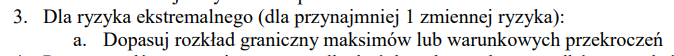

In [3]:
hao = pd.read_csv("JPY.csv").Close
mate = pd.read_csv("AUD.csv").Close

In [4]:
hao.iloc[295] = np.mean([hao.iloc[294], hao.iloc[296]])
mate.iloc[295] = np.mean([mate.iloc[294], mate.iloc[296]])

In [5]:
hao1 = np.diff(hao)/hao[:-1]*100
mate1 = np.diff(mate)/mate[:-1]*100

In [6]:
def find_minimum(data,interval_length):
    n_intervals = int(np.floor(len(data)/interval_length))
    minimum = [np.min(data[i:i+5]) for i in range(n_intervals)]
    return(minimum)

def density(x_axis, sigma, mu, ksi):
    if ksi == 0:
        y = [np.e ** (np.e ** (-(x-mu)/sigma)) for x in x_axis]
    else:
        y = [np.e ** (-(1 + ksi * ((x-mu)/sigma)) ** (-1 / ksi)) for x in x_axis]
    return(y)

In [11]:
hao1

0       0.317566
1       0.260363
2      -0.078467
3      -0.204735
4       0.340985
          ...   
1299   -0.142492
1300    1.167528
1301    0.471428
1302    0.109606
1303   -1.184880
Name: Close, Length: 1304, dtype: float64

(array([ 5.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  5., 10., 24., 19.,
        24., 39., 63., 36., 58., 24.,  9.]),
 array([-2.03067168e+00, -1.92377937e+00, -1.81688706e+00, -1.70999474e+00,
        -1.60310243e+00, -1.49621012e+00, -1.38931780e+00, -1.28242549e+00,
        -1.17553318e+00, -1.06864086e+00, -9.61748550e-01, -8.54856237e-01,
        -7.47963923e-01, -6.41071610e-01, -5.34179297e-01, -4.27286984e-01,
        -3.20394670e-01, -2.13502357e-01, -1.06610044e-01,  2.82269189e-04,
         1.07174582e-01]),
 <BarContainer object of 20 artists>)

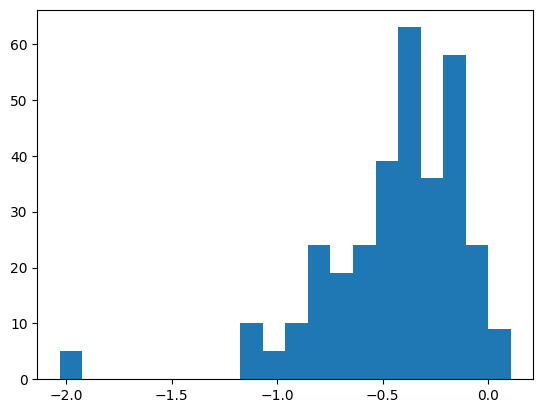

In [12]:
mins_hao_diff = find_minimum(hao1, 4)
plt.hist(mins_hao_diff, bins=20)

In [13]:
from scipy.stats import gumbel_r

In [36]:
xx = np.linspace(-2, 0.5, 1304)

In [14]:
params = gumbel_r.fit(hao1)

In [33]:
x = gumbel_r.pdf(hao1, loc=params[1], scale=params[0])

In [35]:
len(x)

1304

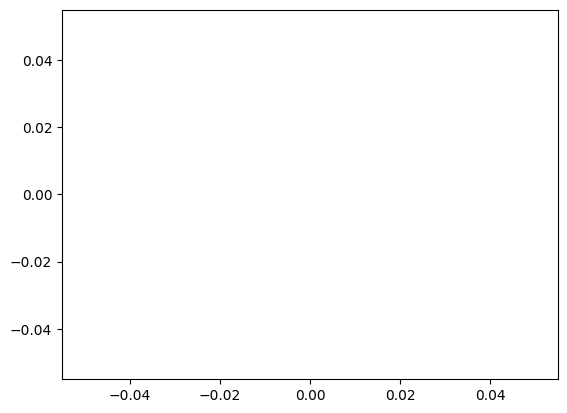

In [38]:
#plt.hist(mins_hao_diff, bins=20, density=True)
plt.scatter(xx, x, color="red")
plt.show()

In [21]:
from scipy.stats import weibull_min

In [28]:
params2 = weibull_min.fit(hao1)
pdf = weibull_min.pdf(hao1, params2[0], scale=1/params2[1])

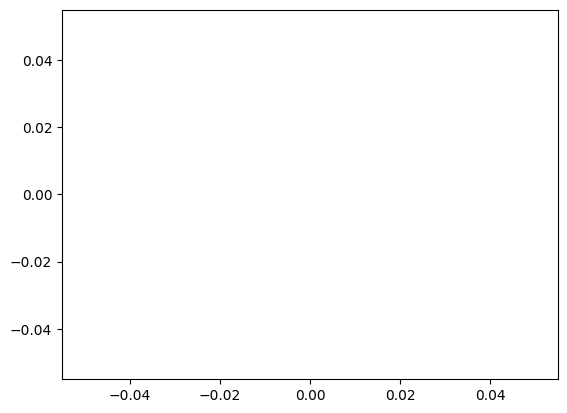

In [30]:
#plt.hist(mins_hao_diff, bins=20, density=True)
plt.scatter(hao1, pdf, color="red")
plt.show()

In [39]:
from scipy.stats import genextreme as gev

In [41]:
shape, loc, scale = gev.fit(mins_hao_diff)
(shape,loc,scale)

(0.5717674928847771, -0.5148469031191572, 0.3587030123088652)

In [42]:
def find_x_axis(shape,loc,scale,mins):
    lim = loc - scale / shape
    if shape > 0:
        x = np.linspace(lim, max(mins), num = 100)
    elif shape == 0:
        x = np.linspace(min(mins), max(mins))
    else:
        x = np.linspace(min(mins), loc)
    return(x)

In [50]:
def draw_gev(shape,loc,scale,mins):
    x_axis = find_x_axis(shape,loc,scale,mins)
    y_axis = gev.pdf(x_axis, shape, loc, scale)
    plt.scatter(x = x_axis, y = y_axis, color="green")

In [44]:
def gev_distribution(mins):
    shape, loc, scale = gev.fit(mins)
    draw_gev(shape,loc,scale, mins)

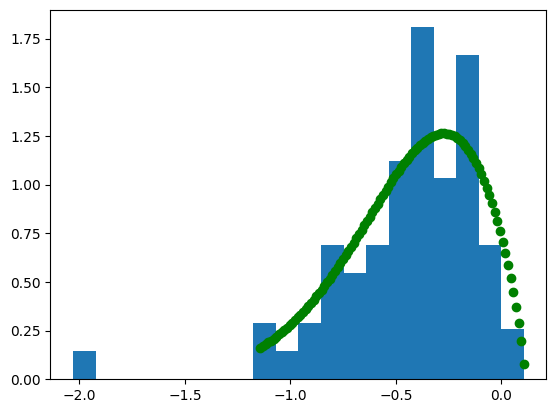

In [51]:
plt.hist(mins_hao_diff, bins = 20, density=True)
gev_distribution(mins_hao_diff)
#draw_gev(shape, loc, scale, mins_silver_diff)

(array([10.,  0.,  0.,  5.,  9.,  5.,  8., 10., 10., 29., 27., 30., 42.,
        29., 30., 40., 14., 17.,  9.,  2.]),
 array([-1.69287434, -1.5986259 , -1.50437745, -1.41012901, -1.31588056,
        -1.22163212, -1.12738367, -1.03313522, -0.93888678, -0.84463833,
        -0.75038989, -0.65614144, -0.561893  , -0.46764455, -0.3733961 ,
        -0.27914766, -0.18489921, -0.09065077,  0.00359768,  0.09784612,
         0.19209457]),
 <BarContainer object of 20 artists>)

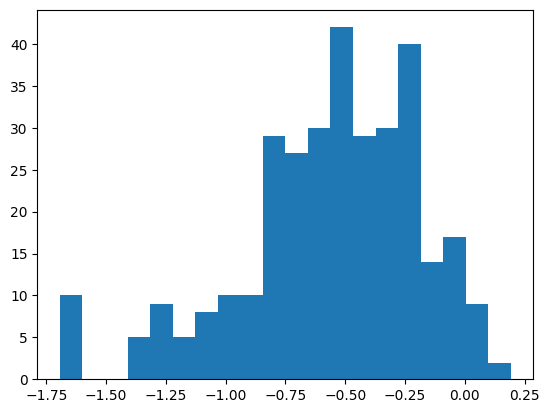

In [52]:
mins_mate_diff = find_minimum(mate1, 4)
plt.hist(mins_mate_diff, bins=20)

In [64]:
shape, loc, scale = gev.fit(mins_mate_diff)
(shape,loc,scale)

(0.46906041614883837, -0.6641161551417787, 0.409614442685195)

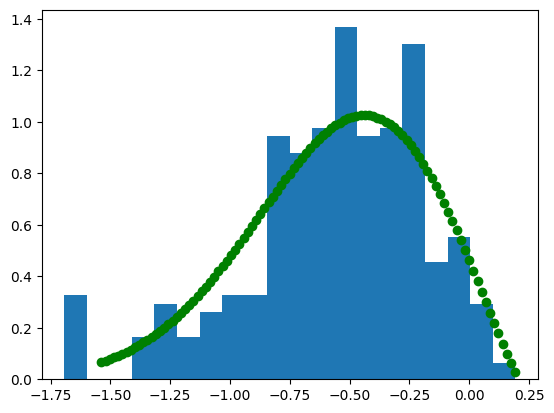

In [54]:
plt.hist(mins_mate_diff, bins = 20, density=True)
gev_distribution(mins_mate_diff)
#draw_gev(shape, loc, scale, mins_silver_diff)

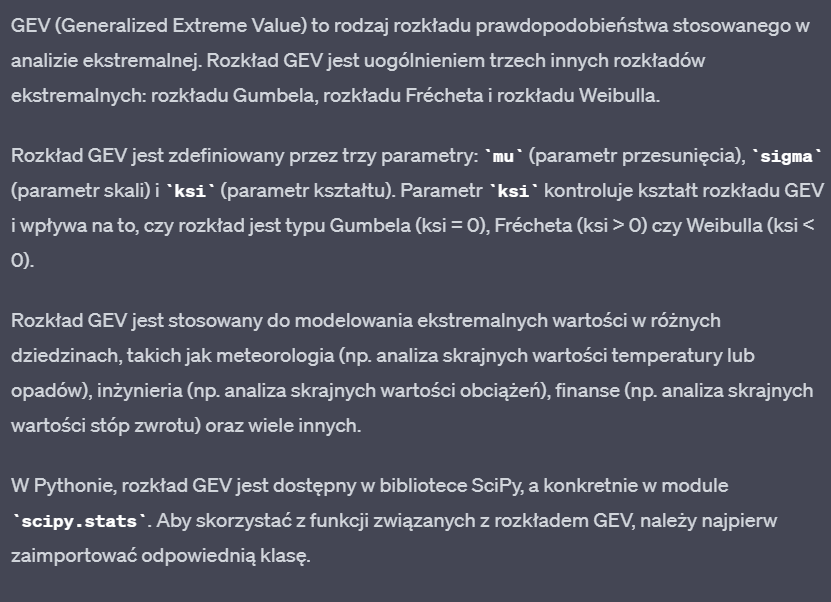

In [57]:
from scipy.stats import frechet_r

ImportError: cannot import name 'frechet_r' from 'scipy.stats' (C:\Users\alicj\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\__init__.py)

In [58]:
def f(x, c, loc, scale):
    return (c/scale) * ((x-loc)/scale)(-1-c) * exp(-((x-loc)/scale)(-c))

C:\Users\alicj\AppData\Local\Temp\ipykernel_17280\271573165.py:17: RuntimeWarning: invalid value encountered in power
  pdf = (c/scale) * ((x-loc)/scale)**(-1-c) * np.exp(-((x-loc)/scale)**(-c))
C:\Users\alicj\AppData\Local\Temp\ipykernel_17280\271573165.py:20: RuntimeWarning: invalid value encountered in power
  cdf = 1 - np.exp(-((x-loc)/scale)**(-c))


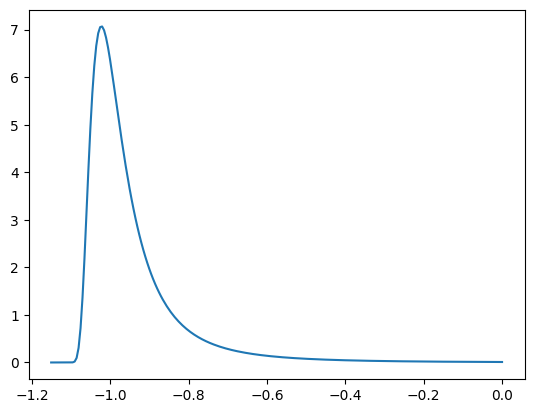

In [67]:
mu = np.mean(mins_mate_diff)
sigma = np.std(mins_mate_diff)

# szacowanie parametrów rozkładu Frécheta
c = 1.0 / sigma
loc = mu - sigma*(0.5772 + np.log(c))
scale = sigma / c

# przedział, na którym będziemy rysować rozkład
x_min = -5
x_max = 0

# wektor punktów na przedziale [x_min, x_max]
x = np.linspace(x_min, x_max, 1000)

# funkcja gęstości prawdopodobieństwa
pdf = (c/scale) * ((x-loc)/scale)**(-1-c) * np.exp(-((x-loc)/scale)**(-c))

# funkcja dystrybuanty
cdf = 1 - np.exp(-((x-loc)/scale)**(-c))

# narysuj wykres funkcji gęstości prawdopodobieństwa i dystrybuanty
plt.plot(x, pdf, label='PDF')

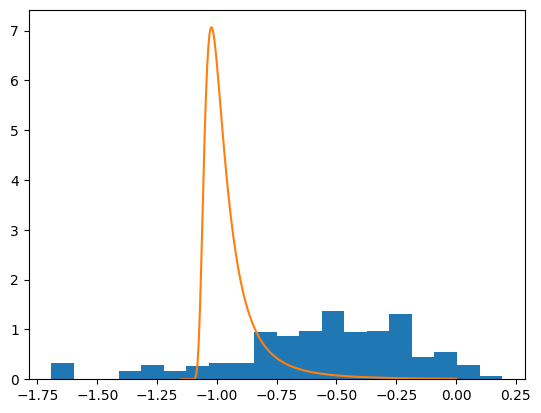

In [68]:
plt.hist(mins_mate_diff, bins = 20, density=True)
plt.plot(x, pdf, label='PDF')